In [2]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
train = pd.read_csv("Cases/Big Mart Sales/processed_train.csv")
train.head()

,Item_Identifier,i_weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,O_Size
0,DRA12,11.600,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,Tier 2,Supermarket Type1,2552.6772,Medium
1,DRA24,19.350,Regular,0.040154,Soft Drinks,164.6868,OUT017,2007,Tier 2,Supermarket Type1,1146.5076,Medium
2,DRA59,8.270,Regular,0.000000,Soft Drinks,183.2924,OUT017,2007,Tier 2,Supermarket Type1,2406.2012,Medium
3,DRB13,6.115,Regular,0.007084,Soft Drinks,191.1530,OUT017,2007,Tier 2,Supermarket Type1,3415.5540,Medium
4,DRB24,8.785,Low Fat,0.020694,Soft Drinks,153.1656,OUT017,2007,Tier 2,Supermarket Type1,1853.5872,Medium


In [14]:
X = train.drop(["Item_Identifier",
                "Item_Outlet_Sales",
                "Outlet_Identifier"],
               axis = 1)           

In [20]:
dumX = pd.get_dummies(X, drop_first = True)
dumX.head()

,i_weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,O_Size_Medium,O_Size_Small
0,11.600,0.041178,140.3154,2007,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
1,19.350,0.040154,164.6868,2007,1,0,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
2,8.270,0.000000,183.2924,2007,1,0,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
3,6.115,0.007084,191.1530,2007,1,0,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
4,8.785,0.020694,153.1656,2007,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0


pca = PCA()
scaler = StandardScaler()
pipe  =PIpeline(["Scaling", scaler], ["PCA", pca])

In [25]:
scaler = StandardScaler()
scaler.fit(dumX)
dumX_scaled = scaler.fit_transform(dumX)

In [37]:
pca = PCA()
prin_compare =pca.fit_transform(dumX_scaled)

In [27]:
pd_PC = pd.DataFrame(prin_compare,
                    columns = [ "PC"+ str(i) for i in range(1,28) ])


In [28]:
print(pca.explained_variance_ratio_*100)

[1.22855346e+01 7.32647409e+00 5.53828265e+00 4.96995523e+00
 4.42917704e+00 4.32116411e+00 4.16609791e+00 4.09342366e+00
 4.05912024e+00 4.00494626e+00 3.95118168e+00 3.88838088e+00
 3.82864047e+00 3.80638597e+00 3.80102908e+00 3.77009362e+00
 3.73454492e+00 3.51711845e+00 3.32724159e+00 3.28382709e+00
 2.76524780e+00 2.26114936e+00 1.61096883e+00 5.32077995e-01
 4.19960233e-01 3.05309967e-01 2.66627335e-03]


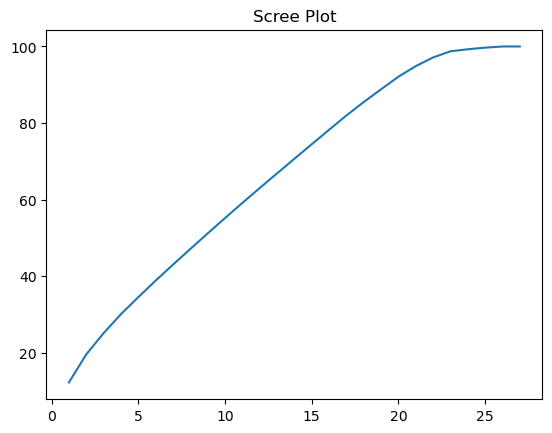

In [38]:
ys = np.cumsum(pca.explained_variance_ratio_*100)
xs = np.arange(1,28)
plt.plot(xs, ys)
plt.title("Scree Plot")
plt.xlabel("")
plt.ylabel("")
plt.show()